In [1]:
%load_ext autotime

time: 241 µs


In [10]:
import numpy as np
import _pickle as pickle
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

time: 672 ms


In [3]:
code_seq_2013 = pickle.load(open("../../DATA/code_seq_2013","rb"))
cost_seq_2013 = pickle.load(open("../../DATA/cost_seq_2013","rb"))
date_seq_2013 = pickle.load(open("../../DATA/date_seq_2013","rb"))
util_seq_2013 = pickle.load(open("../../DATA/util_seq_2013","rb"))

TMAE_Embedding = pickle.load(open("../../MODELS/TMAE/Embeddings/TMAE_Embedding_100","rb"))

time: 13.6 s


In [4]:
diag2cat = pickle.load(open("../../DATA/CCS/diag2cat","rb"))
drug2cat = pickle.load(open("../../DATA/CCS/drug2cat","rb"))

time: 23.4 ms


In [100]:
def plot(i, ymax=None):
    week_seq = []
    for w in date_seq_2013[i]:
        week_seq.append(w//7)
    
    util_seq = []
    for u in util_seq_2013[i]:
        if "RX" in u:
            util_seq.append(0)
        elif "IP" in u:
            util_seq.append(2)
        else:
            util_seq.append(1)

    dic = {0:"green", 1:"b", 2:"r"}
    
    scatter = plt.scatter(week_seq, cost_seq_2013[i], s=80, marker='^', c=[dic[u] for u in util_seq])
    plt.plot(week_seq, cost_seq_2013[i], '--')
    if ymax: plt.ylim(ymax[0],ymax[1])
    plt.xlabel("Weeks")
    plt.ylabel("Cost ($)")
    lgd = plt.legend(*scatter.legend_elements())
    plt.savefig("Patient_"+str(i))
    plt.show()

time: 2.49 ms


In [95]:
ccs_seq = []

for p in code_seq_2013:
    p_ccs = []
    for v in p:
        v_ccs = []
        for c in v:
            if c in diag2cat:
                new_c = diag2cat[c]
                v_ccs.append(new_c)
            
            elif c in drug2cat:
                new_c = drug2cat[c]
                v_ccs.append(new_c)
                
        p_ccs.append(list(set(v_ccs)))
    ccs_seq.append(p_ccs)

time: 3.38 s


In [155]:
for i, p in enumerate(code_seq_2013):
    for v in p:
        if "D_493.00" in v:
            if sum(cost_seq_2013[i])>15000:
                print(i)
                print(a)

11241


NameError: name 'a' is not defined

time: 37.8 ms


In [162]:
from matplotlib.colors import ListedColormap

def plot(i, ymax=None, legend_flag=0):
    week_seq = []
    for w in date_seq_2013[i]:
        week_seq.append(w//7)
    
    util_seq = []
    for u in util_seq_2013[i]:
        if "RX" in u:
            util_seq.append(0)
        elif "IP" in u:
            util_seq.append(2)
        else:
            util_seq.append(1)

    classes = ['Pharmacy visit', 'Outpatient visit', 'Inpatient visit']
    colours = ListedColormap(['g','b','r'])
    
    scatter = plt.scatter(week_seq, cost_seq_2013[i], s=80, marker='^', c=util_seq, cmap=colours)
    plt.plot(week_seq, cost_seq_2013[i], '--')
    if ymax: plt.ylim(ymax[0],ymax[1])
    plt.xlabel("Weeks")
    plt.ylabel("Cost ($)")
    print(scatter.legend_elements()[0])
    if legend_flag: plt.legend(handles=scatter.legend_elements()[0], labels=classes)
    plt.savefig("HighAsthma_"+str(i))
    plt.show()

time: 4.32 ms


11241
[<matplotlib.lines.Line2D object at 0x135b46890>, <matplotlib.lines.Line2D object at 0x135a44a10>, <matplotlib.lines.Line2D object at 0x135b46f50>]


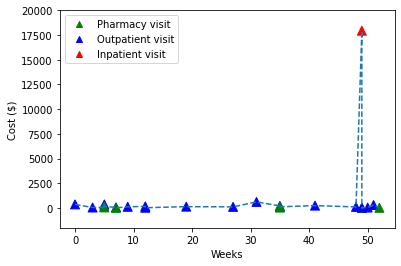

[['211'], ['58', '128'], ['Asthma/COPD Therapy - Beta Adrenergic Agents', 'Asthma Therapy - Leukotriene Modulators'], ['211'], ['Asthma/COPD Therapy Agents'], ['257', '208'], ['Laxatives'], ['211'], ['204', '244'], ['2603', '244'], [], ['257', '208'], ['58', '200', '255', '163'], ['128', '253'], ['Asthma/COPD Therapy - Beta Adrenergic Agents'], ['GI Acid Secretion Reducing Agents - Antisecretory Agents', 'Asthma/COPD Therapy Agents'], ['128', '251', '155'], ['208'], ['217', '208', '95'], ['Analgesic Narcotic Agonists and Combinations'], ['95'], ['257'], [], ['Laxatives']]

42900
[<matplotlib.lines.Line2D object at 0x135c0a390>, <matplotlib.lines.Line2D object at 0x135b8b4d0>, <matplotlib.lines.Line2D object at 0x135b49b10>]


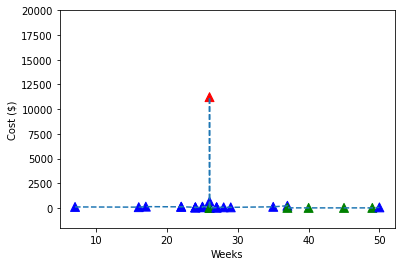

[['2603', '211'], ['211', '2612', '232', '244'], ['239', '244'], [], ['204', '232'], ['232', '254'], ['204', '254'], ['204', '254'], ['232', '254'], ['258', '255'], ['154', '251'], ['172', '259', '251'], ['172'], ['Analgesic Narcotic Hydrocodone Combinations'], ['Laxatives'], ['172'], ['232', '254'], ['204', '254'], ['232', '254'], ['232', '254'], ['89'], ['251'], ['Contraceptive Oral Combinations', 'Analgesic Narcotic Agonists and Combinations'], ['Contraceptive Oral Combinations'], ['Contraceptive Oral Combinations'], ['Contraceptive Oral Combinations'], []]

117211
[<matplotlib.lines.Line2D object at 0x135caae90>, <matplotlib.lines.Line2D object at 0x135c2ff50>, <matplotlib.lines.Line2D object at 0x135caaf10>]


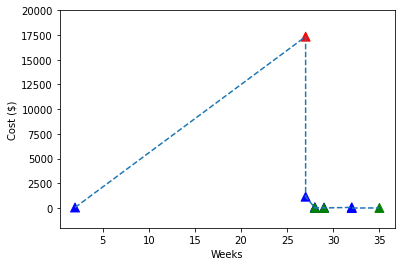

[['257', '212'], ['226', '204', '212', '259', '2603'], ['256', '226', '212', '95'], ['204', '95'], ['204', '95', '226'], ['Analgesic Narcotic Agonists and Combinations', 'Antianxiety Agents'], ['257', '231'], ['Analgesic Narcotic Hydrocodone Combinations'], ['212', '255'], ['98', '252'], ['NSAID Analgesics (Cyclooxygenase Inhibitors-Non-Selective)', 'Skeletal Muscle Relaxants']]

109306
[<matplotlib.lines.Line2D object at 0x135d4d9d0>, <matplotlib.lines.Line2D object at 0x135d0b4d0>, <matplotlib.lines.Line2D object at 0x135d4df90>]


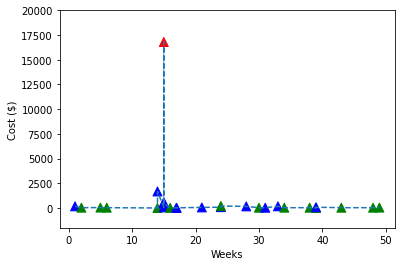

[['257', '212', '259'], ['Asthma Therapy - Leukotriene Modulators'], ['Asthma/COPD Therapy - Beta Adrenergic Agents'], ['Asthma Therapy - Leukotriene Modulators'], ['Analgesic Narcotic Agonist Combinations'], ['204', '231'], ['238'], ['246', '238', '204', '2616', '244'], ['3', '244', '238', '236'], ['3', '237', '197', '238'], ['Cephalosporin Antibiotics'], ['244'], ['244'], [], ['255', '10'], ['Asthma/COPD Therapy - Beta Adrenergic Agents', 'Asthma/COPD Therapy Agents', 'Asthma Therapy - Leukotriene Modulators'], [], ['Asthma Therapy - Leukotriene Modulators'], ['255', '10'], ['257', '217'], ['Asthma Therapy - Leukotriene Modulators'], ['Asthma Therapy - Leukotriene Modulators'], ['Penicillin Antibiotics'], ['126'], ['Asthma Therapy - Leukotriene Modulators'], ['Asthma Therapy - Leukotriene Modulators'], ['Asthma/COPD Therapy - Beta Adrenergic Agents']]

31018
[<matplotlib.lines.Line2D object at 0x135df19d0>, <matplotlib.lines.Line2D object at 0x135d00950>, <matplotlib.lines.Line2D obj

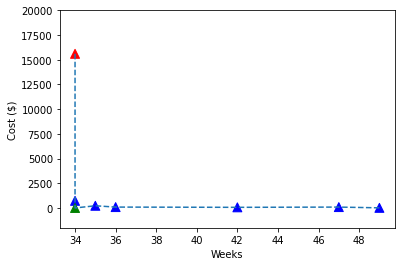

[['251', '257', '204', '237', '212'], ['237', '212'], ['Analgesic Narcotic Hydrocodone Combinations'], ['258', '231'], ['257', '212'], [], ['257', '231'], ['10']]

time: 1.26 s


In [163]:
cos = cosine_similarity(TMAE_Embedding[i:i+1], TMAE_Embedding)[0]
for idx, k in enumerate(np.argsort(cos)[-5:][::-1]):
    print(k)
    if idx==0: plot(k, (-2000, 20000), 1)
    else: plot(k, (-2000, 20000))
    print(ccs_seq[k])
    print()

In [167]:
from matplotlib.colors import ListedColormap

def plot(i, ymax=None, legend_flag=0):
    week_seq = []
    for w in date_seq_2013[i]:
        week_seq.append(w//7)
    
    util_seq = []
    for u in util_seq_2013[i]:
        if "RX" in u:
            util_seq.append(0)
        elif "IP" in u:
            util_seq.append(2)
        else:
            util_seq.append(1)

    classes = ['Pharmacy visit', 'Outpatient visit', 'Inpatient visit']
    colours = ListedColormap(['g','r','b'])
    scatter = plt.scatter(week_seq, cost_seq_2013[i], s=80, marker='^', c=util_seq, cmap=colours)
    plt.plot(week_seq, cost_seq_2013[i], '--')
    if ymax: plt.ylim(ymax[0],ymax[1])
    plt.xlabel("Weeks")
    plt.ylabel("Cost ($)")
    print(scatter.legend_elements()[0])
    if legend_flag: plt.legend(handles=scatter.legend_elements()[0], labels=classes)
    plt.savefig("LowAsthma_"+str(i))
    plt.show()

time: 3.19 ms


In [168]:
for i, p in enumerate(code_seq_2013):
    for v in p:
        if "D_493.00" in v:
            if sum(cost_seq_2013[i])<1000 and len(cost_seq_2013[i])>10:
                print(i)
                print(a)

1401


NameError: name 'a' is not defined

time: 16.1 ms


1401
[<matplotlib.lines.Line2D object at 0x136177a90>, <matplotlib.lines.Line2D object at 0x136166d50>]


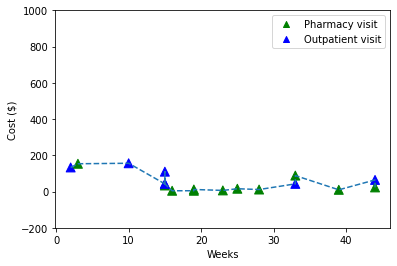

[['123', '246'], ['Antiemetics', 'Asthma/COPD Therapy - Beta Adrenergic Agents', 'Influenza-A & B Antiviral Agents'], ['204', '211'], ['128', '127'], ['128', '240'], ['Narcotic Antitussive-Antihistamine Combinations', 'Macrolide Antibiotics and Combinations', 'Asthma/COPD Therapy Agents', 'Glucocorticoids and Combinations'], ['128', '127'], ['Antihistamines'], ['Antihistamines'], ['Asthma/COPD Therapy Agents'], ['Dermatological - Scabicides & Pediculicides'], ['Antihistamines', 'Asthma/COPD Therapy Agents'], ['Asthma/COPD Therapy Agents'], ['125', '7'], ['NSAID Analgesics (Cyclooxygenase Inhibitors-Non-Selective)', 'Macrolide Antibiotics and Combinations', 'Asthma/COPD Therapy - Beta Adrenergic Agents', 'GI Acid Secretion Reducing Agents - Antisecretory Agents', 'Non-Narc Antitussive-Antihistamine-Decongestant Combinations'], ['Antihistamines', 'GI Acid Secretion Reducing Agents - Antisecretory Agents'], ['125', '137'], ['Macrolide Antibiotics and Combinations', 'Narcotic Antitussive-A

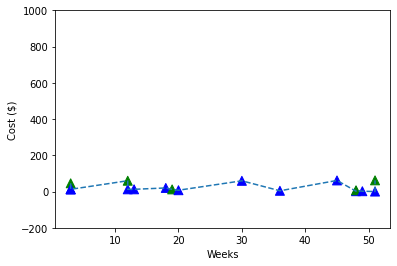

[['Macrolide Antibiotics and Combinations', 'Asthma/COPD Therapy Agents', 'Glucocorticoids and Combinations'], ['128', '127'], ['128', '127'], ['125', '246'], ['Macrolide Antibiotics and Combinations', 'Asthma/COPD Therapy Agents', 'Non-Narc Antitussive-Antihistamine-Decongestant Combinations', 'Glucocorticoids and Combinations'], ['128', '127'], ['128', '127'], ['133', '126'], ['Penicillin Antibiotics', 'Asthma/COPD Therapy Agents'], ['92'], ['246', '92'], ['134', '133'], [], ['128', '92'], ['Cephalosporin Antibiotics', 'Antihistamines', 'Asthma/COPD Therapy Agents'], ['128', '134'], ['123', '126'], ['Antihistamines', 'Influenza-A & B Antiviral Agents', 'Asthma/COPD Therapy Agents']]

91668
[<matplotlib.lines.Line2D object at 0x1362acf90>, <matplotlib.lines.Line2D object at 0x13621d750>]


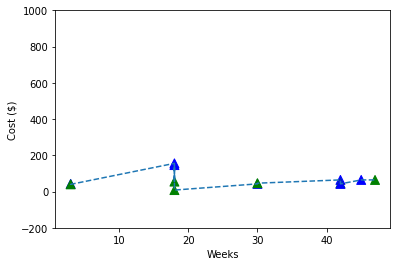

[['246', '127'], ['Macrolide Antibiotics and Combinations', 'NSAID Analgesics (Cyclooxygenase Inhibitors-Non-Selective)', 'Non-Narc Antitussive-Antihistamine-Decongestant Combinations'], ['128', '246', '127'], ['Macrolide Antibiotics and Combinations', 'NSAID Analgesics (Cyclooxygenase Inhibitors-Non-Selective)', 'Non-Narc Antitussive-Antihistamine-Decongestant Combinations'], ['197', '200'], ['Cephalosporin Antibiotics'], ['127'], ['Antihistamines', 'Macrolide Antibiotics and Combinations', 'Non-Narc Antitussive-Antihistamine-Decongestant Combinations'], ['125', '128'], ['Macrolide Antibiotics and Combinations', 'Narcotic Antitussive-Antihistamine Combinations', 'NSAID Analgesics (Cyclooxygenase Inhibitors-Non-Selective)', 'Glucocorticoids and Combinations'], ['125', '128'], ['135', '246'], ['Cephalosporin Antibiotics']]

92239
[<matplotlib.lines.Line2D object at 0x13633b550>, <matplotlib.lines.Line2D object at 0x13618fd50>]


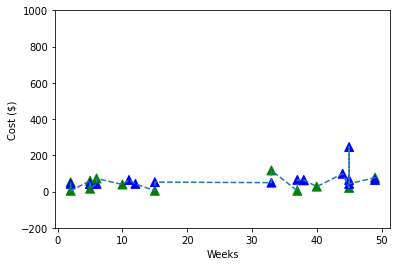

[['Penicillin Antibiotic - Beta-lactamase Inhibitor Combinations', 'Non-Narc Antitussive-Antihistamine-Decongestant Combinations'], ['92', '126'], ['Antihistamines'], ['Macrolide Antibiotics and Combinations', 'Narcotic Antitussive-Antihistamine Combinations', 'NSAID Analgesics (Cyclooxygenase Inhibitors-Non-Selective)', 'Glucocorticoids and Combinations'], ['128', '127'], ['128', '127'], ['Asthma/COPD Therapy Agents'], ['128', '127'], ['Cephalosporin Antibiotics', 'Otic Combinations'], ['Macrolide Antibiotics and Combinations', 'Otic Combinations', 'Antihistamines'], ['127', '92'], ['92', '126'], ['Antihistamines'], [], ['128', '246', '127', '126'], ['NSAID Analgesics (Cyclooxygenase Inhibitors-Non-Selective)', 'Cephalosporin Antibiotics', 'Antihistamines'], ['Antihistamines'], ['255'], ['Narcotic Antitussive-Antihistamine Combinations', 'Macrolide Antibiotics and Combinations', 'Asthma/COPD Therapy Agents', 'Glucocorticoids and Combinations'], ['128', '127'], ['Antiemetics', 'Non-Nar

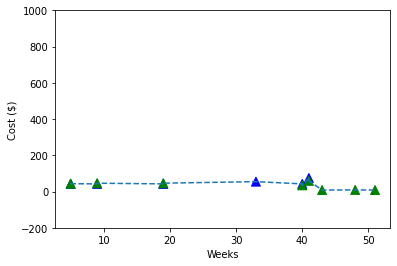

[['246', '127'], ['Macrolide Antibiotics and Combinations', 'NSAID Analgesics (Cyclooxygenase Inhibitors-Non-Selective)', 'Non-Narc Antitussive-Antihistamine-Decongestant Combinations'], ['246', '127'], ['Macrolide Antibiotics and Combinations', 'NSAID Analgesics (Cyclooxygenase Inhibitors-Non-Selective)', 'Non-Narc Antitussive-Antihistamine-Decongestant Combinations'], ['127'], ['Macrolide Antibiotics and Combinations', 'NSAID Analgesics (Cyclooxygenase Inhibitors-Non-Selective)', 'Non-Narc Antitussive-Antihistamine-Decongestant Combinations'], ['255'], ['134', '126'], ['Macrolide Antibiotics and Combinations', 'Non-Narc Antitussive-Antihistamine-Decongestant Combinations'], ['125', '128'], ['Narcotic Antitussive-Antihistamine Combinations', 'Cephalosporin Antibiotics', 'Asthma/COPD Therapy Agents', 'Glucocorticoids and Combinations'], ['Asthma/COPD Therapy Agents'], ['Asthma/COPD Therapy Agents'], ['Asthma/COPD Therapy Agents']]

time: 1.16 s


In [169]:
cos = cosine_similarity(TMAE_Embedding[i:i+1], TMAE_Embedding)[0]
for idx, k in enumerate(np.argsort(cos)[-5:][::-1]):
    print(k)
    if idx==0: plot(k, (-200, 1000), 1)
    else: plot(k, (-200, 1000))
    print(ccs_seq[k])
    print()

In [82]:
for i, p in enumerate(code_seq_2013):
    for v in p:
        if "D_493.00" in v:
            if len([cost for cost in cost_seq_2013[i] if cost>500])>=10:
                print(i)
                

143385
time: 319 ms


143385


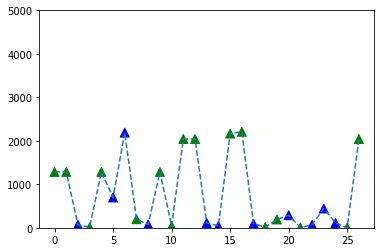

[['Antipsychotic - Atypical Agents, General'], ['Antipsychotic - Atypical Agents, General'], ['124', '126'], ['Macrolide Antibiotics and Combinations'], ['Antipsychotic - Atypical Agents, General'], ['141', '55', '154', '251'], ['128', '253'], ['Asthma/COPD Therapy - Beta Adrenergic Agents', 'Antihistamines', 'Nasal Preparations', 'Asthma/COPD Therapy Agents'], ['654'], ['Antipsychotic - Atypical Agents, General'], ['Asthma/COPD Therapy - Beta Adrenergic Agents'], ['Antipsychotic - Atypical Agents, General'], ['Antipsychotic - Atypical Agents, General'], ['155'], ['89'], ['Antipsychotic - Atypical Agents, General', 'Asthma/COPD Therapy Agents'], ['Asthma/COPD Therapy - Beta Adrenergic Agents', 'Antipsychotic - Atypical Agents, General', 'Asthma/COPD Therapy Agents'], [], ['Antipsychotic - Atypical Dopamine-Serotonin Antagonists'], ['Nasal Preparations', 'Asthma/COPD Therapy - Beta Adrenergic Agents', 'Antihistamines', 'Asthma/COPD Therapy Agents'], ['128', '255'], ['Asthma/COPD Therapy

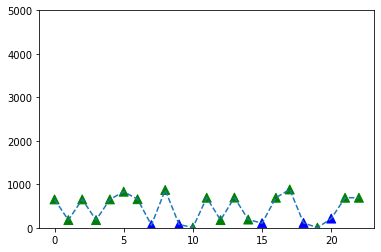

[['Antipsychotic - Atypical Agents, General'], ['Attention Deficit-Hyperact Disorder (ADHD) Therapy'], ['Antipsychotic - Atypical Agents, General'], ['Attention Deficit-Hyperact Disorder (ADHD) Therapy'], ['Antipsychotic - Atypical Agents, General'], ['Antipsychotic - Atypical Agents, General', 'Attention Deficit-Hyperact Disorder (ADHD) Therapy'], ['Antihypertensive Therapy Agents', 'Antipsychotic - Atypical Agents, General'], [], ['Antipsychotic - Atypical Agents, General', 'Attention Deficit-Hyperact Disorder (ADHD) Therapy'], ['154'], ['Antihistamines'], ['Antipsychotic - Atypical Agents, General'], ['Attention Deficit-Hyperact Disorder (ADHD) Therapy'], ['Antihypertensive Therapy Agents', 'Antipsychotic - Atypical Agents, General'], ['Attention Deficit-Hyperact Disorder (ADHD) Therapy'], [], ['Antipsychotic - Atypical Agents, General'], ['Antipsychotic - Atypical Agents, General', 'Attention Deficit-Hyperact Disorder (ADHD) Therapy'], ['89'], ['Antihypertensive Therapy Agents'], [

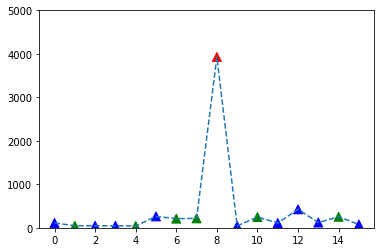

[['135', '128'], ['Asthma/COPD Therapy - Beta Adrenergic Agents', 'Antihistamines'], ['128', '135'], ['135'], ['Asthma/COPD Therapy - Beta Adrenergic Agents'], ['128', '255'], ['Asthma/COPD Therapy - Beta Adrenergic Agents', 'Asthma/COPD Therapy Agents'], ['Asthma/COPD Therapy - Beta Adrenergic Agents', 'Antihistamines', 'Asthma/COPD Therapy Agents'], ['128', '257', '126'], ['128'], ['Asthma/COPD Therapy Agents', 'Antihistamines', 'Asthma/COPD Therapy - Beta Adrenergic Agents', 'Asthma Therapy - Leukotriene Modulators', 'Glucocorticoids and Combinations'], ['128'], ['128', '133'], ['128', '10'], ['Asthma/COPD Therapy - Beta Adrenergic Agents', 'Asthma/COPD Therapy Agents', 'Antihistamines', 'Asthma Therapy - Leukotriene Modulators'], []]

2047


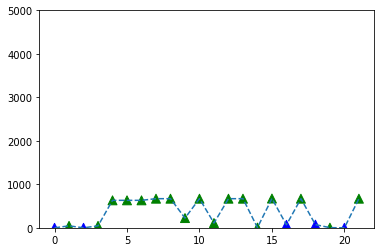

[['259'], ['Antipsychotic - Atypical Dopamine-Serotonin Antagonists'], ['259'], ['Antipsychotic - Atypical Dopamine-Serotonin Antagonists'], ['Antipsychotic - Atypical Agents, General'], ['Antipsychotic - Atypical Agents, General'], ['Antipsychotic - Atypical Agents, General'], ['Antipsychotic - Atypical Agents, General'], ['Antipsychotic - Atypical Agents, General'], ['Antipsychotic - Atypical Agents, General'], ['Antipsychotic - Atypical Agents, General'], ['Attention Deficit-Hyperact Disorder (ADHD) Therapy'], ['Antipsychotic - Atypical Agents, General'], ['Antipsychotic - Atypical Agents, General'], ['Antidepressants'], ['Antipsychotic - Atypical Agents, General', 'Antidepressants'], ['657', '255'], ['Antipsychotic - Atypical Agents, General'], ['91', '89'], ['Antidepressants'], ['259'], ['Antipsychotic - Atypical Agents, General']]

87501


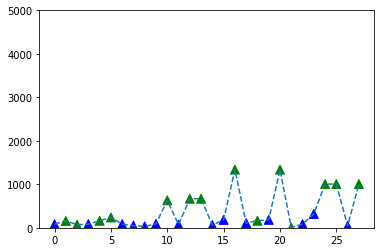

[['128', '126'], ['Pediatric Vitamins and Combinations', 'Asthma/COPD Therapy - Beta Adrenergic Agents', 'Asthma/COPD Therapy Agents', 'Antitussive-Antihistamine Combinations'], ['NSAID Analgesics (Cyclooxygenase Inhibitors-Non-Selective)', 'Cephalosporin Antibiotics'], ['128', '92'], ['Pediatric Vitamins and Combinations', 'Antihistamines', 'Asthma/COPD Therapy - Beta Adrenergic Agents', 'Expectorants', 'Asthma/COPD Therapy Agents', 'Antitussive-Antihistamine Combinations'], ['Penicillin Antibiotic - Beta-lactamase Inhibitor Combinations', 'Otic Combinations', 'Asthma/COPD Therapy Agents'], ['92', '126'], ['92'], ['92'], ['655', '657'], ['Antipsychotic - Atypical Agents, General'], ['655', '657'], ['Antipsychotic - Atypical Agents, General'], ['Antipsychotic - Atypical Agents, General'], [], ['657', '655'], ['Antipsychotic - Atypical Agents, General'], [], ['Pediatric Vitamins and Combinations', 'Asthma/COPD Therapy - Beta Adrenergic Agents', 'Asthma/COPD Therapy Agents'], ['239', '25

In [84]:
i=143385
cos = cosine_similarity(TMAE_Embedding[i:i+1], TMAE_Embedding)[0]
for k in np.argsort(cos)[-5:][::-1]:
    print(k)
    plot(k, 5000)
    print(ccs_seq[k])
    print()